# Notebook para modelamiento

In [55]:
import mlflow
import mlflow.sklearn
import mlflow.keras
import numpy as np
import pandas as pd
import tensorflow as tf
import pandas as pd
import keras    
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import save_model
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# registre el experimento
mlflow.set_tracking_uri("mlruns")
# mlflow.set_tracking_uri('http://localhost:5000')
experiment = mlflow.set_experiment('proyecto3-icfes_test')

In [3]:
df= pd.read_csv("../ingeniera_de_datos/clean_saber11.csv")

In [4]:
df.drop(columns="Unnamed: 0",inplace=True)
df.columns

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
       'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'cole_sede_principal', 'estu_genero',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'desemp_ingles', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global'],
      dtype='object')

In [5]:
df.dtypes

periodo                       int64
estu_tipodocumento           object
cole_area_ubicacion          object
cole_bilingue                object
cole_caracter                object
cole_genero                  object
cole_jornada                 object
cole_mcpio_ubicacion         object
cole_naturaleza              object
cole_sede_principal          object
estu_genero                  object
fami_cuartoshogar            object
fami_educacionmadre          object
fami_educacionpadre          object
fami_estratovivienda         object
fami_personashogar           object
fami_tieneautomovil          object
fami_tienecomputador         object
fami_tieneinternet           object
fami_tienelavadora           object
desemp_ingles                object
punt_ingles                 float64
punt_matematicas            float64
punt_sociales_ciudadanas      int64
punt_c_naturales              int64
punt_lectura_critica          int64
punt_global                   int64
dtype: object

In [6]:
estu_tipodocumento_to_num={"CC":0,"TI":1,"OTHER":2}
zona = {'RURAL': 0,'URBANO': 1}
cole_bilingue_to_num = {"N":0,"S":1,"unknown":-10}
cole_caracter_to_num={"ACADÉMICO":0,"NO APLICA":1, "TÉCNICO":2, "TÉCNICO/ACADÉMICO":3}
cole_genero_to_num={"FEMENINO":0,"MASCULINO":1,"MIXTO":2}
cole_jornada_to_num={"COMPLETA":0,"MAÑANA":1,"NOCHE":2,"SABATINA":3,"TARDE":4,"UNICA":5}
cole_naturaleza_to_num={"NO OFICIAL":0,"OFICIAL":1}
cole_sede_principal_to_num={"S":0,"N":1}
estu_genero_to_num= {"F":0,"M":1,"unknown":-10}
fami_cuartoshogar_to_num={"1 a 2":0,"3 a 4":1,"5":2,"6+":3,"unknown":-10}
fami_educacionm_to_num={"Educación profesional completa":0,
                    "Educación profesional incompleta":1,
                    "Ninguno":2,
                    "No Aplica":2,
                    "No sabe":2,
                    "Postgrado":3,
                    "Primaria completa":4,
                    "Primaria incompleta":5,
                    "Secundaria (Bachillerato) completa":6,
                    "Secundaria (Bachillerato) incompleta":7,
                    "Técnica o tecnológica completa":8,
                    "Técnica o tecnológica incompleta":9,
                    "unknown":-10}
fami_estratovivienda_to_num={ "Estrato 1":1 ,"Estrato 2":2,"Estrato 3":3,"Estrato 4":4,"Estrato 5":5,"Estrato 6":6,"Sin Estrato": -10}
fami_personashogar_to_num = {"1 a 2":0,"3 a 4":1,"5 a 6":2,"7 a 8":3,"9 o más":4,"unknown":-10}
nosi_to_num={"No":0,"Si":1,	"unknown":-10}

In [65]:
def prepare_data(df):
    df["punt_matematicas"]= df["punt_matematicas"].astype("int64")
    df["punt_ingles"]= df["punt_ingles"].astype("int64")
    df["periodo"]= df["periodo"].astype("string")
    df["cole_mcpio_ubicacion"]=df["cole_mcpio_ubicacion"].astype("category")
    df["desemp_ingles"]=df["desemp_ingles"].astype("category")
    # df["estu_tipodocumento"]=df["estu_tipodocumento"].astype("category")
    # df["cole_area_ubicacion"]=df["cole_area_ubicacion"].astype("category")
    # df["cole_bilingue"]=df["cole_bilingue"].astype("category")
    # df["cole_caracter"]=df["cole_caracter"].astype("category")
    # df["cole_genero"]=df["cole_genero"].astype("category")
    # df["cole_jornada"]=df["cole_jornada"].astype("category")
    # df["cole_naturaleza"]=df["cole_naturaleza"].astype("category")
    # df["cole_sede_principal"]=df["cole_sede_principal"].astype("category")
    # df["estu_genero"]=df["estu_genero"].astype("category")
    # df["fami_cuartoshogar"]=df["fami_cuartoshogar"].astype("category")
    # df["fami_educacionmadre"]=df["fami_educacionmadre"].astype("category")
    # df["fami_educacionpadre"]=df["fami_educacionpadre"].astype("category")
    # df["fami_estratovivienda"]=df["fami_estratovivienda"].astype("category")
    # df["fami_personashogar"]=df["fami_personashogar"].astype("category")
    # df["fami_tieneautomovil"]=df["fami_tieneautomovil"].astype("category")
    # df["fami_tienecomputador"]=df["fami_tienecomputador"].astype("category")
    # df["fami_tieneinternet"]=df["fami_tieneinternet"].astype("category")
    # df["fami_tienelavadora"]=df["fami_tienelavadora"].astype("category")
    df["estu_tipodocumento"]= df["estu_tipodocumento"].apply(lambda x: estu_tipodocumento_to_num[x])
    df["cole_area_ubicacion"]= df["cole_area_ubicacion"].apply(lambda x: zona[x])
    df["cole_bilingue"]=df["cole_bilingue"].apply(lambda x: cole_bilingue_to_num[x])
    df["cole_caracter"]=df["cole_caracter"].apply(lambda x: cole_caracter_to_num[x])
    df["cole_genero"]=df["cole_genero"].apply(lambda x: cole_genero_to_num[x])
    df["cole_jornada"]=df["cole_jornada"].apply(lambda x: cole_jornada_to_num[x])
    df["cole_naturaleza"]=df["cole_naturaleza"].apply(lambda x: cole_naturaleza_to_num[x])
    df["cole_sede_principal"]=df["cole_sede_principal"].apply(lambda x: cole_sede_principal_to_num[x])
    df["estu_genero"]=df["estu_genero"].apply(lambda x: estu_genero_to_num[x])
    df["fami_cuartoshogar"]=df["fami_cuartoshogar"].apply(lambda x: fami_cuartoshogar_to_num[x])
    df["fami_educacionmadre"]=df["fami_educacionmadre"].apply(lambda x: fami_educacionm_to_num[x])
    df["fami_educacionpadre"]=df["fami_educacionpadre"].apply(lambda x: fami_educacionm_to_num[x])
    df["fami_estratovivienda"]=df["fami_estratovivienda"].apply(lambda x: fami_estratovivienda_to_num[x])
    df["fami_personashogar"]=df["fami_personashogar"].apply(lambda x: fami_personashogar_to_num[x])
    df["fami_tieneautomovil"]=df["fami_tieneautomovil"].apply(lambda x: nosi_to_num[x])
    df["fami_tienecomputador"]=df["fami_tienecomputador"].apply(lambda x: nosi_to_num[x])
    df["fami_tieneinternet"]=df["fami_tieneinternet"].apply(lambda x: nosi_to_num[x])
    df["fami_tienelavadora"]=df["fami_tienelavadora"].apply(lambda x: nosi_to_num[x])
    return df

In [ ]:
df=prepare_data(df)

In [8]:
df.dtypes

periodo                     string[python]
estu_tipodocumento                   int64
cole_area_ubicacion                  int64
cole_bilingue                        int64
cole_caracter                        int64
cole_genero                          int64
cole_jornada                         int64
cole_mcpio_ubicacion              category
cole_naturaleza                      int64
cole_sede_principal                  int64
estu_genero                          int64
fami_cuartoshogar                    int64
fami_educacionmadre                  int64
fami_educacionpadre                  int64
fami_estratovivienda                 int64
fami_personashogar                   int64
fami_tieneautomovil                  int64
fami_tienecomputador                 int64
fami_tieneinternet                   int64
fami_tienelavadora                   int64
desemp_ingles                     category
punt_ingles                          int64
punt_matematicas                     int64
punt_social

In [9]:
df.columns

Index(['periodo', 'estu_tipodocumento', 'cole_area_ubicacion', 'cole_bilingue',
       'cole_caracter', 'cole_genero', 'cole_jornada', 'cole_mcpio_ubicacion',
       'cole_naturaleza', 'cole_sede_principal', 'estu_genero',
       'fami_cuartoshogar', 'fami_educacionmadre', 'fami_educacionpadre',
       'fami_estratovivienda', 'fami_personashogar', 'fami_tieneautomovil',
       'fami_tienecomputador', 'fami_tieneinternet', 'fami_tienelavadora',
       'desemp_ingles', 'punt_ingles', 'punt_matematicas',
       'punt_sociales_ciudadanas', 'punt_c_naturales', 'punt_lectura_critica',
       'punt_global'],
      dtype='object')

In [10]:
# remove periodo
cat_string_feats=["cole_mcpio_ubicacion"]
cat_num_feats=["estu_tipodocumento","cole_area_ubicacion","cole_bilingue","cole_caracter","cole_genero","cole_jornada","cole_naturaleza","cole_sede_principal","estu_genero","fami_cuartoshogar","fami_educacionmadre","fami_educacionpadre","fami_estratovivienda","fami_personashogar","fami_tieneautomovil","fami_tienecomputador","fami_tieneinternet","fami_tienelavadora"]
possible_targets=["punt_ingles","punt_matematicas","punt_sociales_ciudadanas","punt_c_naturales","punt_lectura_critica","punt_global"]
possible_targets_cat=["desemp_ingles"]

# Define the target to use

In [11]:
target="punt_global"

In [12]:
# sns.pairplot(df,)

In [13]:
feats_ordered = cat_num_feats+cat_string_feats

In [101]:
feats_ordered

['estu_tipodocumento',
 'cole_area_ubicacion',
 'cole_bilingue',
 'cole_caracter',
 'cole_genero',
 'cole_jornada',
 'cole_naturaleza',
 'cole_sede_principal',
 'estu_genero',
 'fami_cuartoshogar',
 'fami_educacionmadre',
 'fami_educacionpadre',
 'fami_estratovivienda',
 'fami_personashogar',
 'fami_tieneautomovil',
 'fami_tienecomputador',
 'fami_tieneinternet',
 'fami_tienelavadora',
 'cole_mcpio_ubicacion']

In [14]:
df = df[feats_ordered+[target]]

In [15]:
df.head()

estu_tipodocumento  cole_area_ubicacion  cole_bilingue  cole_caracter  \
0                   1                    0              0              0   
1                   1                    0              0              0   
2                   0                    1              0              0   
3                   1                    1              0              0   
4                   0                    1              0              3   

   cole_genero  cole_jornada  cole_naturaleza  cole_sede_principal  \
0            2             1                1                    1   
1            2             0                1                    1   
2            2             3                0                    0   
3            2             5                1                    0   
4            2             5                1                    0   

   estu_genero  fami_cuartoshogar  fami_educacionmadre  fami_educacionpadre  \
0            1                  1                    6                    5   
1            1                  3                    9                    1   
2            0                  1                    6                    6   
3            1                -10                    2                    2   
4            0                  0                    4                    4   

   fami_estratovivienda  fami_personashogar  fami_tieneautomovil  \
0                     2                   2                    0   
1                     2                   2                    0   
2                     1                   2                    0   
3                     1                 -10                  -10   
4                     1                   2                    0   

   fami_tienecomputador  fami_tieneinternet  fami_tienelavadora  \
0                     1                   1                   1   
1                     0                   1                   0   
2                     0                   0                   1   
3                   -10                   1                 -10   
4                     0                   0                   1   

  cole_mcpio_ubicacion  punt_global  
0               GARZÓN          248  
1              PALERMO          168  
2             PITALITO          290  
3                NEIVA          314  
4               GARZÓN          241

Separamos los datos en entrenamiento, validación y prueba

In [16]:
train = df.sample(frac=0.8, random_state=100)
train.head()

estu_tipodocumento  cole_area_ubicacion  cole_bilingue  cole_caracter  \
66539                   0                    0            -10              0   
68564                   1                    1            -10              0   
4629                    1                    1              0              2   
34051                   1                    0            -10              0   
36651                   1                    0            -10              0   

       cole_genero  cole_jornada  cole_naturaleza  cole_sede_principal  \
66539            2             2                1                    0   
68564            2             0                0                    0   
4629             2             5                1                    0   
34051            2             0                1                    0   
36651            2             0                1                    0   

       estu_genero  fami_cuartoshogar  fami_educacionmadre  \
66539            0                  1                    5   
68564            1                  1                    7   
4629             1                  1                    9   
34051            1                  1                    5   
36651            1                  1                    7   

       fami_educacionpadre  fami_estratovivienda  fami_personashogar  \
66539                    2                   -10                   2   
68564                    7                     4                   1   
4629                     6                     2                   2   
34051                    5                     1                   3   
36651                    7                     1                   2   

       fami_tieneautomovil  fami_tienecomputador  fami_tieneinternet  \
66539                    0                     0                   0   
68564                    1                     1                   1   
4629                     0                     1                   1   
34051                    0                     0                   0   
36651                    0                     0                   0   

       fami_tienelavadora cole_mcpio_ubicacion  punt_global  
66539                   1               GARZON          205  
68564                   1                NEIVA          288  
4629                    0                NEIVA          224  
34051                   0            GUADALUPE          196  
36651                   0               TARQUI          270

In [17]:
test = df.drop(train.index)
test.head()

estu_tipodocumento  cole_area_ubicacion  cole_bilingue  cole_caracter  \
1                    1                    0              0              0   
9                    1                    1            -10              2   
10                   1                    0              0              2   
15                   0                    0            -10              0   
17                   1                    1              0              0   

    cole_genero  cole_jornada  cole_naturaleza  cole_sede_principal  \
1             2             0                1                    1   
9             2             5                1                    0   
10            2             5                1                    0   
15            2             0                1                    0   
17            2             1                0                    0   

    estu_genero  fami_cuartoshogar  fami_educacionmadre  fami_educacionpadre  \
1             1                  3                    9                    1   
9             0                  0                    5                    5   
10            1                  1                    4                    7   
15            1                  1                    2                    2   
17            0                  1                    6                    0   

    fami_estratovivienda  fami_personashogar  fami_tieneautomovil  \
1                      2                   2                    0   
9                      1                   1                    0   
10                     3                   2                    1   
15                     2                   2                    0   
17                     3                   1                    1   

    fami_tienecomputador  fami_tieneinternet  fami_tienelavadora  \
1                      0                   1                   0   
9                      0                   0                   0   
10                     1                   1                   1   
15                     0                   0                   1   
17                     1                   1                   1   

   cole_mcpio_ubicacion  punt_global  
1               PALERMO          168  
9                 NEIVA          277  
10               BARAYA          237  
15                ISNOS          215  
17                NEIVA          263

In [18]:
val = train.sample(frac=0.2, random_state=100)
val.shape

(13328, 20)

In [19]:
train = train.drop(val.index)

In [ ]:
print(f"orginal dataframe size: {df.shape}")
print(f"training dataset size: {train.shape}")
print(f"validation dataset size: {val.shape}")
print(f"test dataset size: {test.shape}")

orginal df shape: (83297, 20)
(53310, 20)
(13328, 20)
(16659, 20)


Calculamos estadísticas de cada variable numérica

In [21]:
train.describe()

estu_tipodocumento  cole_area_ubicacion  cole_bilingue  cole_caracter  \
count        53310.000000         53310.000000   53310.000000   53310.000000   
mean             0.823898             0.752973      -1.657813       1.422153   
std              0.415669             0.431287       3.726138       1.417092   
min              0.000000             0.000000     -10.000000       0.000000   
25%              1.000000             1.000000       0.000000       0.000000   
50%              1.000000             1.000000       0.000000       2.000000   
75%              1.000000             1.000000       0.000000       3.000000   
max              2.000000             1.000000       1.000000       3.000000   

        cole_genero  cole_jornada  cole_naturaleza  cole_sede_principal  \
count  53310.000000  53310.000000     53310.000000         53310.000000   
mean       1.982667      1.578916         0.801688             0.023298   
std        0.165377      1.651044         0.398732             0.150849   
min        0.000000      0.000000         0.000000             0.000000   
25%        2.000000      0.000000         1.000000             0.000000   
50%        2.000000      1.000000         1.000000             0.000000   
75%        2.000000      3.000000         1.000000             0.000000   
max        2.000000      5.000000         1.000000             1.000000   

        estu_genero  fami_cuartoshogar  fami_educacionmadre  \
count  53310.000000       53310.000000         53310.000000   
mean       0.433877           0.528062             4.571506   
std        0.545177           1.540109             3.227442   
min      -10.000000         -10.000000           -10.000000   
25%        0.000000           0.000000             4.000000   
50%        0.000000           1.000000             5.000000   
75%        1.000000           1.000000             6.000000   
max        1.000000           3.000000             9.000000   

       fami_educacionpadre  fami_estratovivienda  fami_personashogar  \
count         53310.000000          53310.000000        53310.000000   
mean              4.346352              1.119977            1.334815   
std               3.142525              2.430596            1.747125   
min             -10.000000            -10.000000          -10.000000   
25%               4.000000              1.000000            1.000000   
50%               5.000000              1.000000            1.000000   
75%               6.000000              2.000000            2.000000   
max               9.000000              6.000000            4.000000   

       fami_tieneautomovil  fami_tienecomputador  fami_tieneinternet  \
count         53310.000000          53310.000000        53310.000000   
mean              0.017370              0.314500            0.153348   
std               1.449533              1.472981            1.813550   
min             -10.000000            -10.000000          -10.000000   
25%               0.000000              0.000000            0.000000   
50%               0.000000              0.000000            0.000000   
75%               0.000000              1.000000            1.000000   
max               1.000000              1.000000            1.000000   

       fami_tienelavadora   punt_global  
count        53310.000000  53310.000000  
mean             0.394222    252.780773  
std              1.474559     47.016011  
min            -10.000000     21.000000  
25%              0.000000    218.000000  
50%              1.000000    249.000000  
75%              1.000000    284.000000  
max              1.000000    461.000000

Función para convertir de dataframe (pandas) a dataset (tensorflow), separando características y etiquetas

In [22]:
def dataframe_to_dataset(dataframe,_target=target):
    dataframe = dataframe.copy()
    labels = dataframe.pop(_target)
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [23]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [24]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("Target:", y)

Input: {'estu_tipodocumento': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cole_area_ubicacion': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cole_bilingue': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cole_caracter': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cole_genero': <tf.Tensor: shape=(), dtype=int64, numpy=2>, 'cole_jornada': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cole_naturaleza': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cole_sede_principal': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'estu_genero': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fami_cuartoshogar': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fami_educacionmadre': <tf.Tensor: shape=(), dtype=int64, numpy=6>, 'fami_educacionpadre': <tf.Tensor: shape=(), dtype=int64, numpy=7>, 'fami_estratovivienda': <tf.Tensor: shape=(), dtype=int64, numpy=5>, 'fami_personashogar': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'fami_tieneautomovil': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'fami_tienecom

2024-12-03 00:40:41.257513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Separamos los datos de entrenamiento, validación y prueba en lotes

In [25]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

Función para codificar variables categóricas (Keras docs)

In [26]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

Creamos una lista de inputs para el modelo, de acuerdo con cada tipo de variable

In [27]:
inputs = []
for i in cat_num_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [28]:
for i in cat_string_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [29]:
for i in inputs:
   print(i)

<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=estu_tipodocumento>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_area_ubicacion>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_bilingue>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_caracter>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_genero>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_jornada>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_naturaleza>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=cole_sede_principal>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=estu_genero>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fami_cuartoshogar>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fami_educacionmadre>
<KerasTensor shape=(None, 1), dtype=int64, sparse=False, name=fami_educacionpadre>
<KerasTensor shape=(None, 1), dtype=int64, spa

Creamos una lista de variables codificadas/normalizadas de acuerdo con su tipo, empleando las funciones de codificación/normalización

In [30]:
feats_encoded=[]
for i,feat in enumerate(cat_num_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )
len_feats=len(feats_encoded)
print(len_feats)

2024-12-03 00:40:43.457630: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-03 00:40:45.368721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-03 00:40:47.351058: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-03 00:40:49.335085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-03 00:40:51.220679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-03 00:40:53.093031: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-12-03 00:40:55.113934: W tensorflow/core/framework/local_rendezvous.cc:404] L

18


2024-12-03 00:41:16.194870: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [31]:
for i,feat in enumerate(cat_string_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )
len_feats = len(feats_encoded)
print(len_feats)

19


2024-12-03 00:41:18.085814: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [32]:
for i in feats_encoded:
  print(i)

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_1>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_2>
<KerasTensor shape=(None, 5), dtype=float32, sparse=False, name=keras_tensor_3>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_4>
<KerasTensor shape=(None, 7), dtype=float32, sparse=False, name=keras_tensor_5>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_6>
<KerasTensor shape=(None, 3), dtype=float32, sparse=False, name=keras_tensor_7>
<KerasTensor shape=(None, 4), dtype=float32, sparse=False, name=keras_tensor_8>
<KerasTensor shape=(None, 6), dtype=float32, sparse=False, name=keras_tensor_9>
<KerasTensor shape=(None, 12), dtype=float32, sparse=False, name=keras_tensor_10>
<KerasTensor shape=(None, 12), dtype=float32, sparse=False, name=keras_tensor_11>
<KerasTensor shape=(None, 8), dtype=fl

Creamos una capa concatenando todas las variables codificadas

In [33]:
all_feats = keras.layers.concatenate(feats_encoded)
type(all_feats)

keras.src.backend.common.keras_tensor.KerasTensor

In [34]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [125]:
def graph_error_function(hist, model_name='Add description here'):
    plt.plot(hist.history['mean_squared_error'], label='MSE')
    plt.plot(hist.history['val_mean_squared_error'], label='VAL_MSE')
    # plt.ylim([1000, 2000])
    plt.xlabel('Epoch')
    plt.ylabel('Error function MSE')
    plt.title(f"Modelo {model_name}")
    plt.legend()
    plt.savefig("plots/error_function1.png")
    plt.show()

    plt.plot(hist.history['mean_absolute_error'], label='MAE')
    plt.plot(hist.history['val_mean_absolute_error'], label='VAL_MAE')
    # plt.ylim([1000, 2000])
    plt.xlabel('Epoch')
    plt.ylabel('Error function MAE')
    plt.title(f"Modelo {model_name}")
    plt.legend()
    plt.savefig("plots/error_function2.png")
    plt.show()
    

def graph_loss_function(hist, model_name='Add description here'):
    plt.plot(hist.history['loss'], label='loss')
    plt.plot(hist.history['val_loss'], label='val_loss')
    # plt.ylim([20, 40])
    plt.xlabel('Epoch')
    plt.ylabel('Loss function')
    plt.title(f"Modelo {model_name}")
    plt.legend()
    plt.savefig("plots/loss_function.png")
    plt.show()
    

def graph_pred_vs_actual(model):
    pred_y=model.predict(test_ds)
    real_y=test[target]
    # Create a scatter plot
    plt.scatter(real_y, pred_y)

    # Add labels and title
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Predicted vs. Actual Values')

    # Add a 45-degree line for reference (perfect prediction)
    plt.plot([min(real_y), max(real_y)], [min(pred_y), max(pred_y)], color='red')
    plt.savefig("plots/pred_vs_actual.png")
    plt.show()

def plot_pred_vs_actual_hist(model, test_ds, test, name):
  """
  Plots histograms of predicted and actual values on the same axis with equal bin widths.

  Args:
      model: The trained Keras model.
      test_ds: The testing dataset.
      target: The name of the target variable in the dataset.
  """
  # Get predictions and actual values
  pred_y = model.predict(test_ds)
  
  real_y = test[target]

  # Determine the common bin edges for both histograms
  min_val = min(min(real_y), min(pred_y))
  max_val = max(max(real_y), max(pred_y))
  bin_edges = np.linspace(min_val, max_val, 20)  # Adjust the number of bins as needed

  # Create the figure and axis
  plt.figure(figsize=(10, 5))

  # Plot both histograms on the same axis with equal bin widths
  plt.hist(real_y, bins=bin_edges, color='blue', alpha=0.7, label='Actual')
  plt.hist(pred_y, bins=bin_edges, color='red', alpha=0.7, label='Predicted')

  # Add labels and title
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.title(f'Distribution of Actual vs. Predicted Values {name}')
  plt.legend()

  # Save the plot
#   plt.savefig("plots/pred_vs_actual_hist_same_axis.png")
  plt.show()

In [36]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [37]:
def run_experiment(model_id='modelo_base',num_neuronas=64, loss_function='mean_absolute_error', epochs=10,activation_func='relu',optimzer="adam"):
    with mlflow.start_run(experiment_id=experiment.experiment_id):
        # Registre los parámetros
        mlflow.log_param("num_nueronas", num_neuronas)
        mlflow.log_param("loss_function", loss_function)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("activation_func", activation_func)
        mlflow.log_param("optimizer",optimzer)
        model_layers_1 = keras.layers.Dense(20, activation=activation_func)(all_feats)
        model_layers_2 = keras.layers.Dense(num_neuronas, activation=activation_func)(model_layers_1)
        model_layers_3 = keras.layers.Dense(32, activation=activation_func)(model_layers_2)
        model_output = keras.layers.Dense(1,activation="linear")(model_layers_3)
        #Creamos el modelo con las capas ya creadas y las variables de entrada
        model = keras.Model(inputs,model_output)
        #Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar
        model.compile(optimizer=optimzer, loss=loss_function, metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])
        hist= model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping]) 
        results = model.evaluate(test_ds, verbose=0)

        metrics_name=['loss_function', 'mean_squared_error', 'mean_absolute_error']  
        for name, value in zip(metrics_name, results):
            mlflow.log_metric(key=f"{name}",value=value)

        model_name= f" {model_id} con {num_neuronas} y {epochs} epocas"
        graph_error_function(hist,model_name)
        mlflow.log_artifact("plots/error_function1.png")
        mlflow.log_artifact("plots/error_function2.png")
        graph_loss_function(hist,model_name)
        mlflow.log_artifact("plots/loss_function.png")
        graph_pred_vs_actual(model)
        mlflow.log_artifact("plots/pred_vs_actual.png")
        mlflow.keras.log_model(model,"keras_model")
        save_model(model, f"models/{model_id}.keras")
    return model
        

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 10573.9795 - mean_absolute_error: 65.6898 - mean_squared_error: 10573.9795 - val_loss: 1500.7344 - val_mean_absolute_error: 31.0327 - val_mean_squared_error: 1500.7344
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1502.1937 - mean_absolute_error: 31.0605 - mean_squared_error: 1502.1937 - val_loss: 1530.4478 - val_mean_absolute_error: 31.1921 - val_mean_squared_error: 1530.4478
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1472.8475 - mean_absolute_error: 30.7051 - mean_squared_error: 1472.8475 - val_loss: 1473.6259 - val_mean_absolute_error: 30.8478 - val_mean_squared_error: 1473.6259
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1477.0513 - mean_absolute_error: 30.7546 - mean_squared_error: 1477.0513 - val_loss: 1482.3457 - val_mean_absolute_error: 30.6702 - val_mean_squared_error: 1482.3457
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1448.3297 - mean_ab

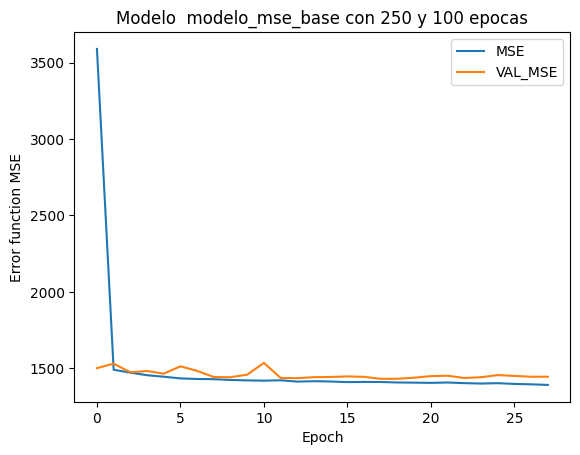

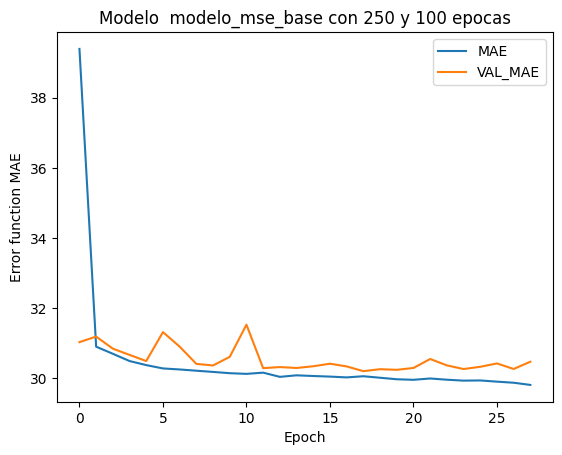

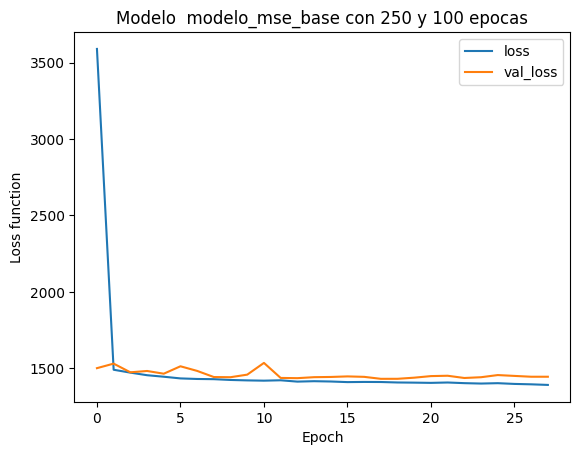

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


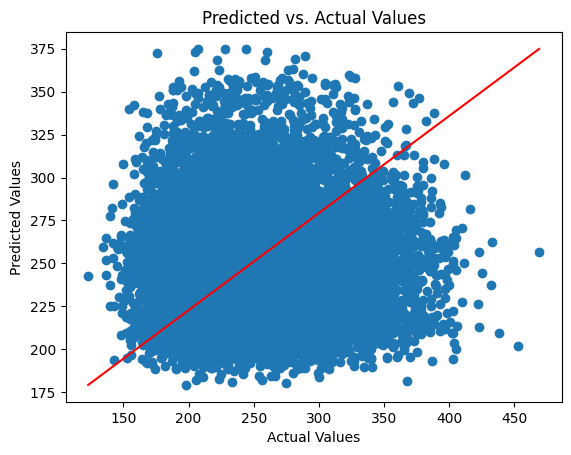

2024/12/03 00:44:17 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 00:44:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [38]:
model= run_experiment(model_id='modelo_mse_base',num_neuronas=250, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8042.6172 - mean_absolute_error: 57.2524 - mean_squared_error: 8042.6172 - val_loss: 1599.5773 - val_mean_absolute_error: 32.1344 - val_mean_squared_error: 1599.5773
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1539.1863 - mean_absolute_error: 31.3083 - mean_squared_error: 1539.1863 - val_loss: 1525.7435 - val_mean_absolute_error: 31.1934 - val_mean_squared_error: 1525.7435
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1530.6732 - mean_absolute_error: 31.2418 - mean_squared_error: 1530.6732 - val_loss: 1584.3833 - val_mean_absolute_error: 31.6330 - val_mean_squared_error: 1584.3833
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1519.5564 - mean_absolute_error: 31.1815 - mean_squared_error: 1519.5564 - val_loss: 1516.4272 - val_mean_absolute_error: 31.2651 - val_mean_squared_error: 1516.4272
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1501.6217 - mean_abso

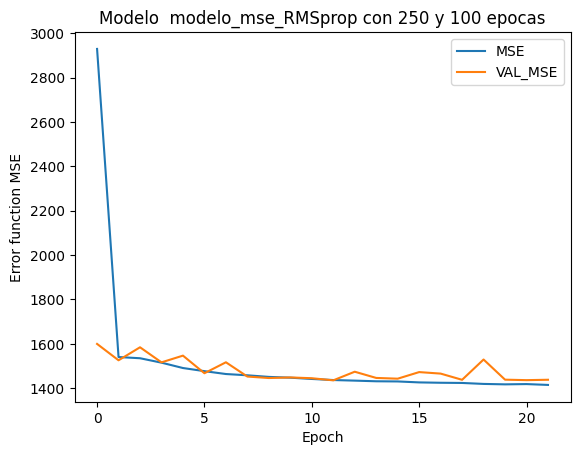

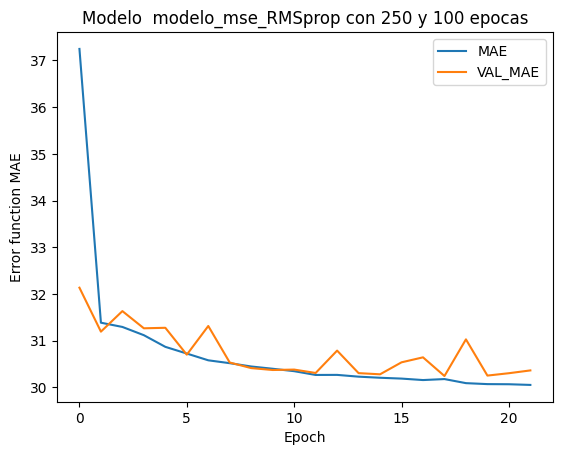

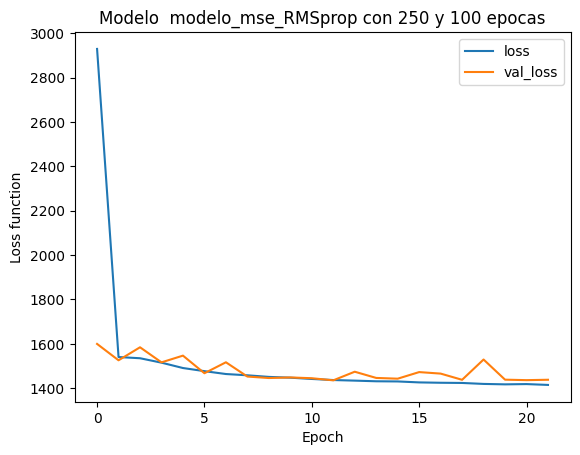

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


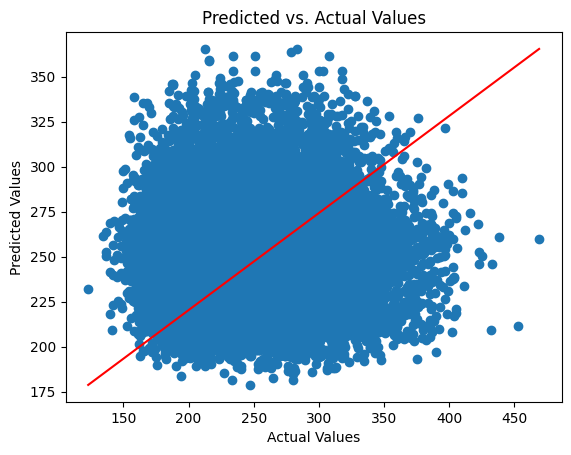

2024/12/03 00:46:54 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 00:47:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [39]:
model= run_experiment(model_id='modelo_mse_RMSprop',num_neuronas=250, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 11805.4355 - mean_absolute_error: 69.8387 - mean_squared_error: 11805.4355 - val_loss: 1534.4703 - val_mean_absolute_error: 31.3000 - val_mean_squared_error: 1534.4703
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1515.9087 - mean_absolute_error: 31.1711 - mean_squared_error: 1515.9087 - val_loss: 1535.3051 - val_mean_absolute_error: 31.2932 - val_mean_squared_error: 1535.3051
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1520.4531 - mean_absolute_error: 31.2547 - mean_squared_error: 1520.4531 - val_loss: 1539.2606 - val_mean_absolute_error: 31.3949 - val_mean_squared_error: 1539.2606
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1527.0996 - mean_absolute_error: 31.3038 - mean_squared_error: 1527.0996 - val_loss: 1596.6019 - val_mean_absolute_error: 31.7765 - val_mean_squared_error: 1596.6019
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1520.1206 - mean_a

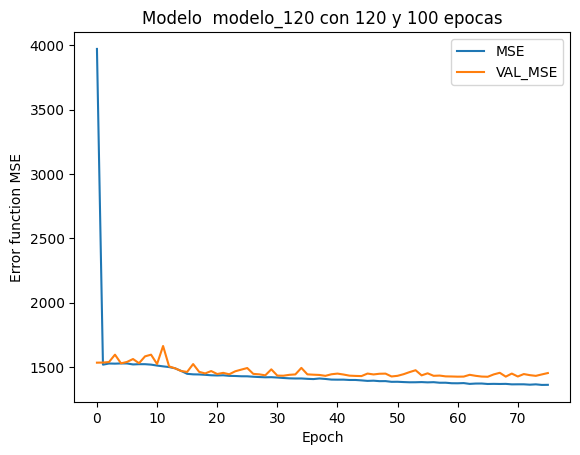

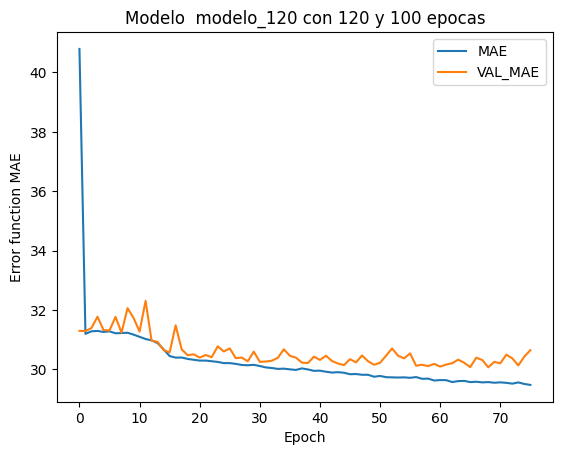

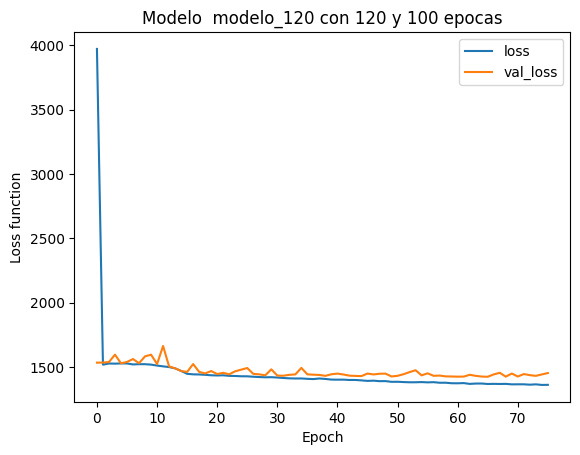

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


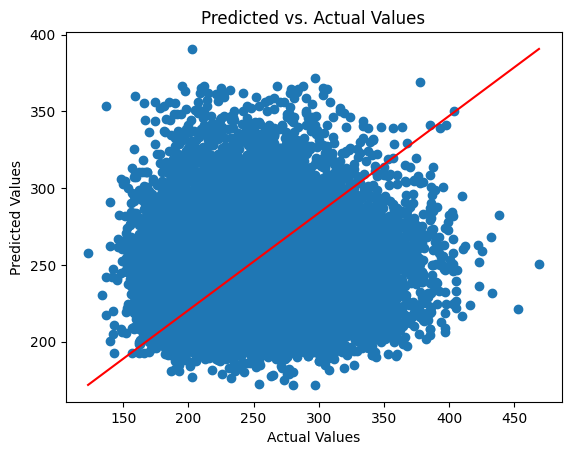

2024/12/03 00:55:09 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 00:55:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [40]:
model= run_experiment(model_id='modelo_120',num_neuronas=120, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")  

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 10919.1309 - mean_absolute_error: 67.5932 - mean_squared_error: 10919.1309 - val_loss: 1532.7159 - val_mean_absolute_error: 31.2517 - val_mean_squared_error: 1532.7159
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1514.3866 - mean_absolute_error: 31.1203 - mean_squared_error: 1514.3866 - val_loss: 1534.4435 - val_mean_absolute_error: 31.1952 - val_mean_squared_error: 1534.4435
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1495.9786 - mean_absolute_error: 30.9355 - mean_squared_error: 1495.9786 - val_loss: 1508.3940 - val_mean_absolute_error: 31.1542 - val_mean_squared_error: 1508.3940
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1481.5673 - mean_absolute_error: 30.7051 - mean_squared_error: 1481.5673 - val_loss: 1502.6418 - val_mean_absolute_error: 31.1927 - val_mean_squared_error: 1502.6418
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1456.4174 - mean_ab

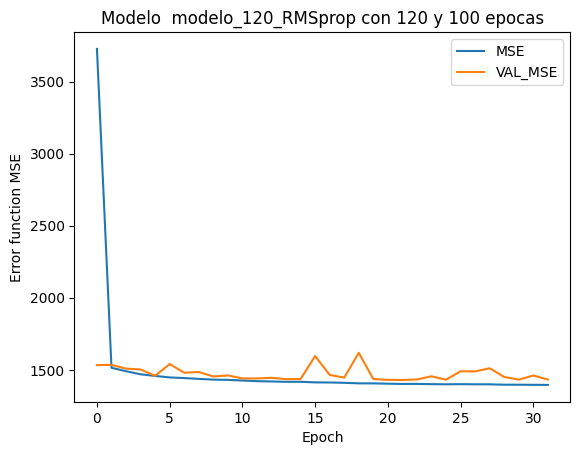

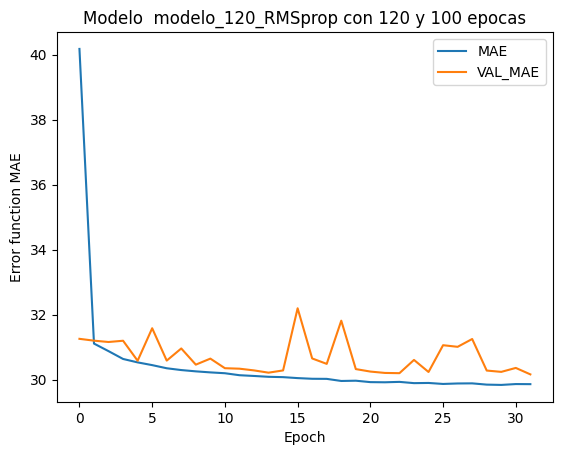

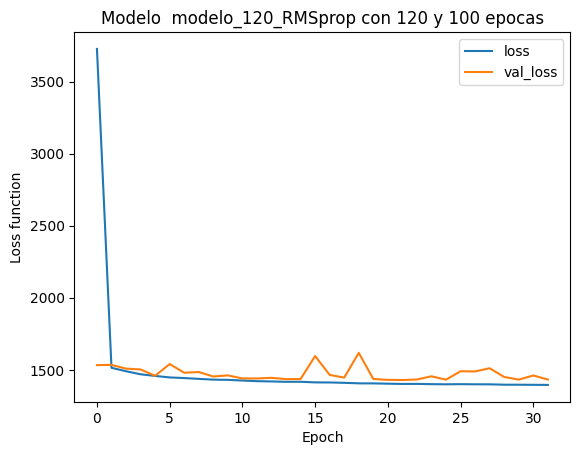

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


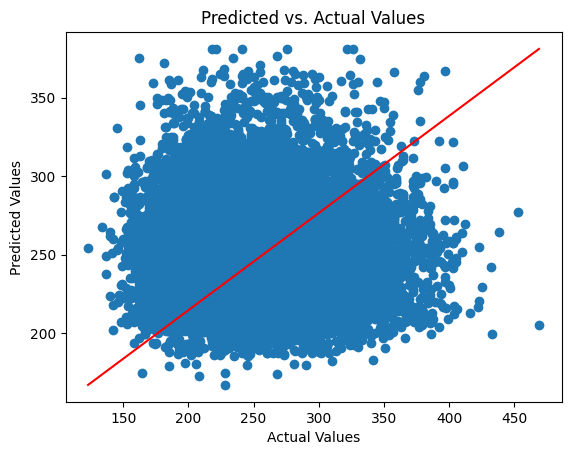

2024/12/03 00:58:53 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 00:59:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [41]:
model= run_experiment(model_id='modelo_120_RMSprop',num_neuronas=120, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")  

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 14003.4688 - mean_absolute_error: 77.6431 - mean_squared_error: 14003.4688 - val_loss: 1517.1630 - val_mean_absolute_error: 31.1929 - val_mean_squared_error: 1517.1630
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1508.8807 - mean_absolute_error: 31.0852 - mean_squared_error: 1508.8807 - val_loss: 1508.2952 - val_mean_absolute_error: 30.9988 - val_mean_squared_error: 1508.2952
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1457.7799 - mean_absolute_error: 30.5230 - mean_squared_error: 1457.7799 - val_loss: 1486.9436 - val_mean_absolute_error: 30.8254 - val_mean_squared_error: 1486.9436
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1467.3926 - mean_absolute_error: 30.6818 - mean_squared_error: 1467.3926 - val_loss: 1607.2371 - val_mean_absolute_error: 31.8041 - val_mean_squared_error: 1607.2371
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1473.8439 - mean_ab

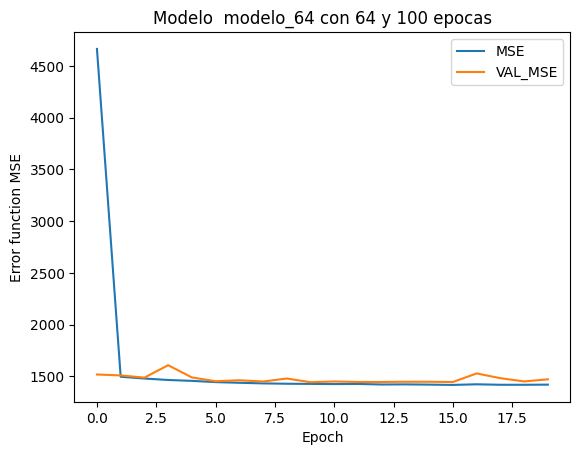

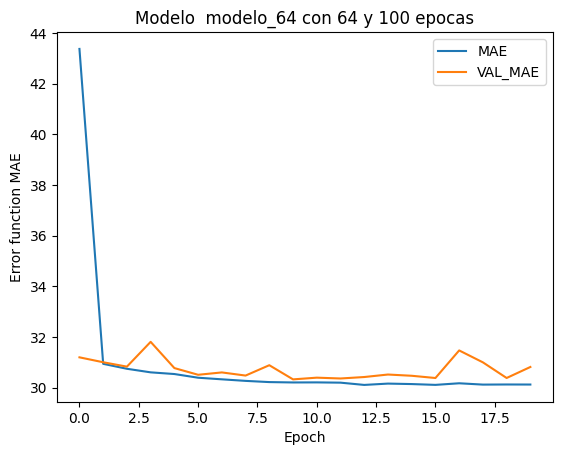

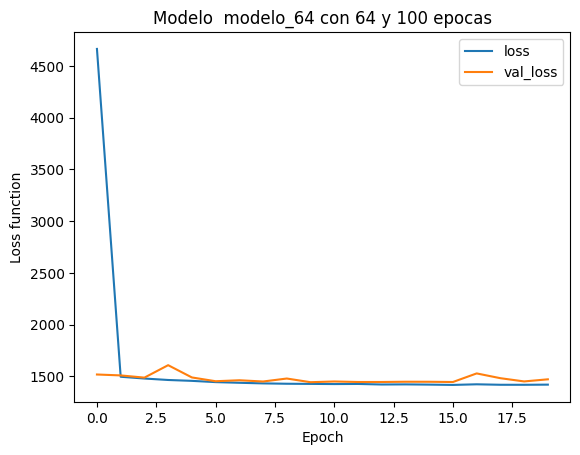

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


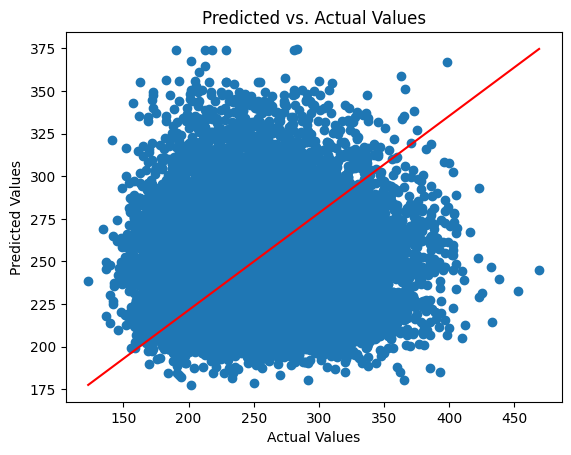

2024/12/03 01:01:26 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:01:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [42]:
model= run_experiment(model_id='modelo_64',num_neuronas=64, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 13444.1816 - mean_absolute_error: 77.0023 - mean_squared_error: 13444.1816 - val_loss: 1534.2631 - val_mean_absolute_error: 31.2881 - val_mean_squared_error: 1534.2631
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1541.9474 - mean_absolute_error: 31.4421 - mean_squared_error: 1541.9474 - val_loss: 1533.8148 - val_mean_absolute_error: 31.2848 - val_mean_squared_error: 1533.8148
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1527.8285 - mean_absolute_error: 31.3260 - mean_squared_error: 1527.8285 - val_loss: 1532.9989 - val_mean_absolute_error: 31.2884 - val_mean_squared_error: 1532.9989
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1522.1669 - mean_absolute_error: 31.2214 - mean_squared_error: 1522.1669 - val_loss: 1534.1632 - val_mean_absolute_error: 31.3796 - val_mean_squared_error: 1534.1632
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1515.2073 - mean_ab

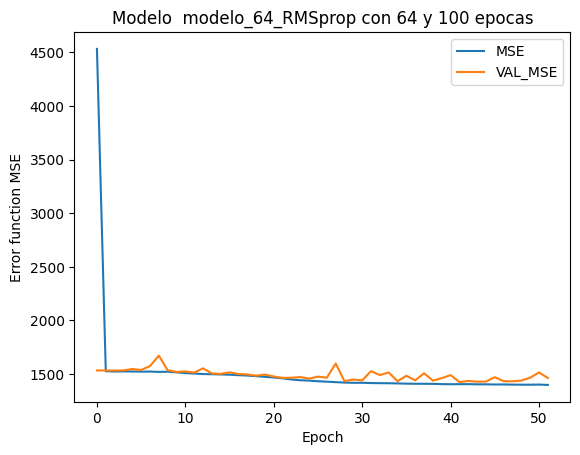

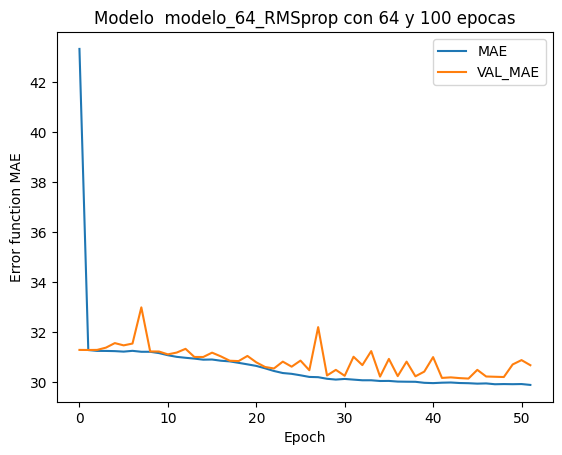

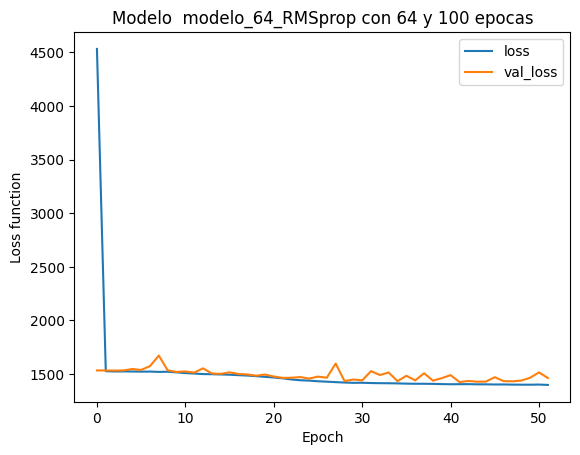

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


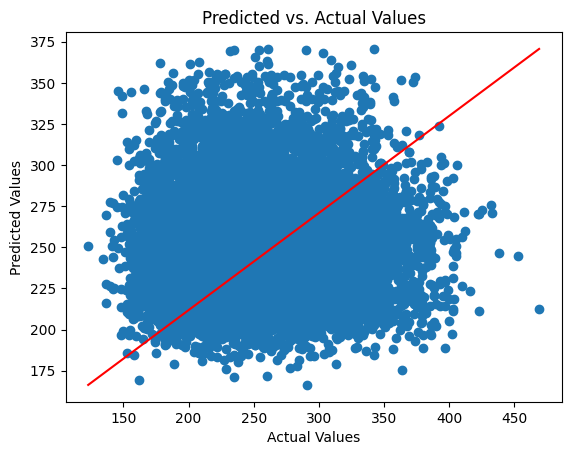

2024/12/03 01:06:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:06:58 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [43]:

model= run_experiment(model_id='modelo_64_RMSprop',num_neuronas=64, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 14774.6748 - mean_absolute_error: 80.8228 - mean_squared_error: 14774.6748 - val_loss: 1540.1031 - val_mean_absolute_error: 31.4887 - val_mean_squared_error: 1540.1031
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1506.4152 - mean_absolute_error: 31.0047 - mean_squared_error: 1506.4152 - val_loss: 1526.0903 - val_mean_absolute_error: 31.0830 - val_mean_squared_error: 1526.0903
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1466.1923 - mean_absolute_error: 30.7206 - mean_squared_error: 1466.1923 - val_loss: 1471.5093 - val_mean_absolute_error: 30.6861 - val_mean_squared_error: 1471.5093
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1457.9170 - mean_absolute_error: 30.4520 - mean_squared_error: 1457.9170 - val_loss: 1461.6049 - val_mean_absolute_error: 30.5988 - val_mean_squared_error: 1461.6049
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1449.9656 - mean_ab

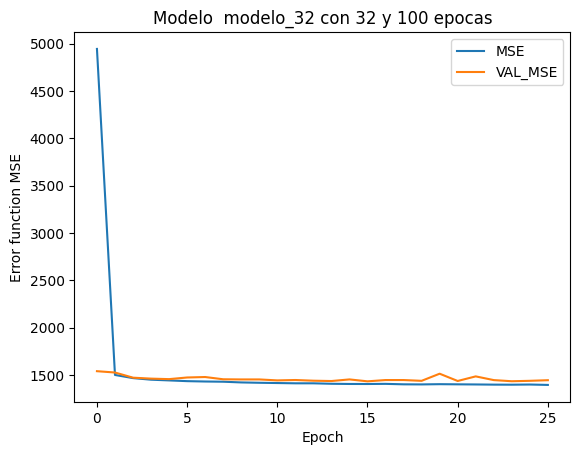

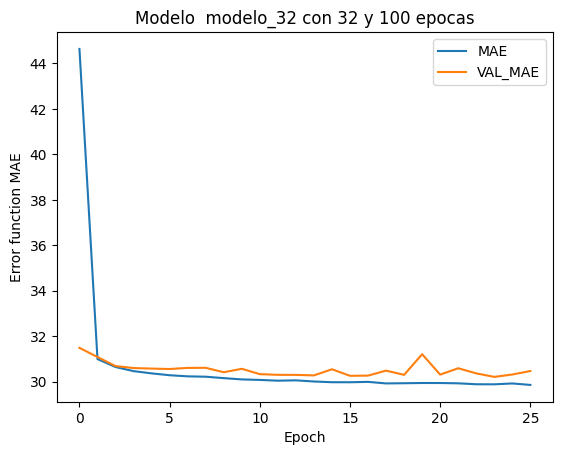

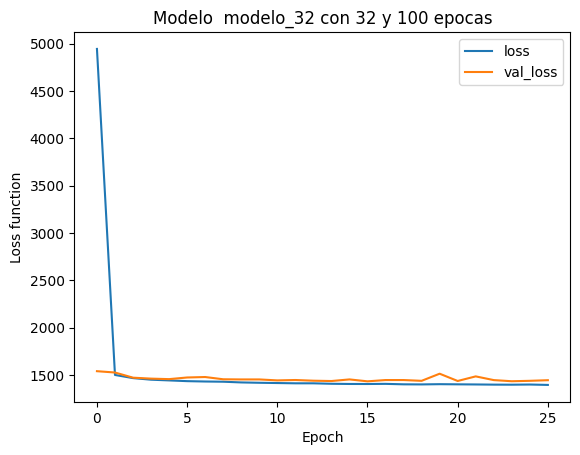

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


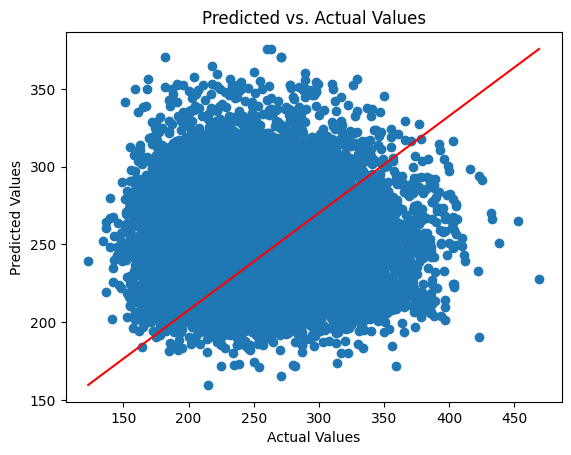

2024/12/03 01:10:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:10:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [44]:
model= run_experiment(model_id='modelo_32',num_neuronas=32, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 13777.6934 - mean_absolute_error: 78.5892 - mean_squared_error: 13777.6934 - val_loss: 1517.0629 - val_mean_absolute_error: 31.1820 - val_mean_squared_error: 1517.0629
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 1503.9503 - mean_absolute_error: 31.0298 - mean_squared_error: 1503.9503 - val_loss: 1518.9573 - val_mean_absolute_error: 31.3755 - val_mean_squared_error: 1518.9573
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1471.8285 - mean_absolute_error: 30.8010 - mean_squared_error: 1471.8285 - val_loss: 1476.3517 - val_mean_absolute_error: 30.7512 - val_mean_squared_error: 1476.3517
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1461.3263 - mean_absolute_error: 30.5246 - mean_squared_error: 1461.3263 - val_loss: 1487.2727 - val_mean_absolute_error: 30.9812 - val_mean_squared_error: 1487.2727
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1442.4987 - mean_a

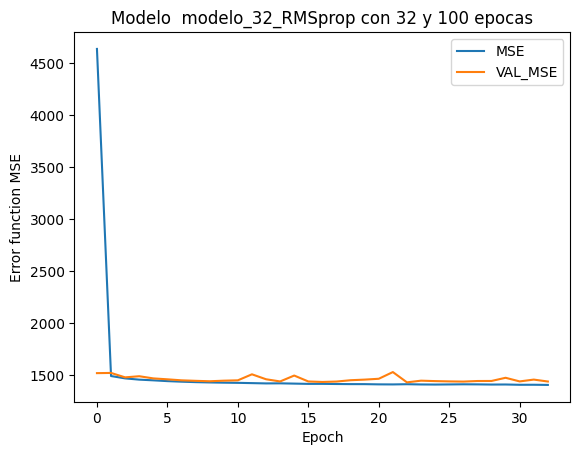

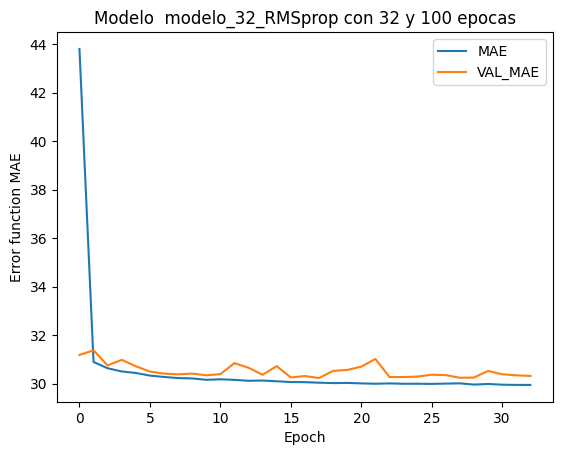

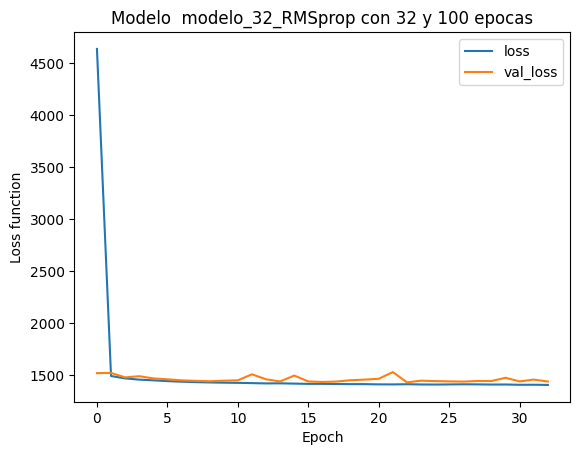

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


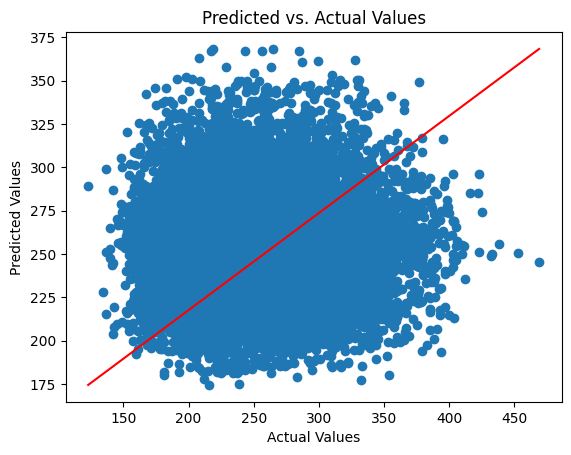

2024/12/03 01:13:32 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:13:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [45]:
model= run_experiment(model_id='modelo_32_RMSprop',num_neuronas=32, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [46]:
def run_experimen_2(model_id='modelo_base',num_neuronas=64, loss_function='mean_absolute_error', epochs=10,activation_func='relu',optimzer="adam"):
    with mlflow.start_run(experiment_id=experiment.experiment_id):
        # Registre los parámetros
        mlflow.log_param("num_nueronas", num_neuronas)
        mlflow.log_param("loss_function", loss_function)
        mlflow.log_param("epochs", epochs)
        mlflow.log_param("activation_func", activation_func)
        mlflow.log_param("optimizer",optimzer)
        model_layers_1 = keras.layers.Dense(20, activation=activation_func)(all_feats)
        model_layers_2 = keras.layers.Dense(num_neuronas, activation=activation_func)(model_layers_1)
        model_layers_3 = keras.layers.Dense(32, activation=activation_func)(model_layers_2)
        model_layers_4 = keras.layers.Dense(20, activation=activation_func)(model_layers_3)
        model_output = keras.layers.Dense(1,activation="linear")(model_layers_4)
        #Creamos el modelo con las capas ya creadas y las variables de entrada
        model = keras.Model(inputs,model_output)
        #Compilamos el modelo, definiendo optimizador, función de pérdida y métricas adicionales a capturar
        model.compile(optimizer=optimzer, loss=loss_function, metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])
        hist= model.fit(train_ds, epochs=epochs, validation_data=val_ds, callbacks=[early_stopping]) 
        results = model.evaluate(test_ds, verbose=0)

        metrics_name=['loss_function', 'mean_squared_error', 'mean_absolute_error']  
        for name, value in zip(metrics_name, results):
            mlflow.log_metric(key=f"{name}",value=value)

        model_name= f" {model_id} con {num_neuronas} y {epochs} epocas"
        graph_error_function(hist,model_name)
        mlflow.log_artifact("plots/error_function1.png")
        mlflow.log_artifact("plots/error_function2.png")
        graph_loss_function(hist,model_name)
        mlflow.log_artifact("plots/loss_function.png")
        graph_pred_vs_actual(model)
        mlflow.log_artifact("plots/pred_vs_actual.png")
        mlflow.keras.log_model(model,"keras_model")
        save_model(model, f"models/{model_id}.keras")
    return model
        

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 10412.6221 - mean_absolute_error: 64.5407 - mean_squared_error: 10412.6221 - val_loss: 1540.1649 - val_mean_absolute_error: 31.3673 - val_mean_squared_error: 1540.1649
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1523.1608 - mean_absolute_error: 31.2101 - mean_squared_error: 1523.1608 - val_loss: 1588.6755 - val_mean_absolute_error: 32.0737 - val_mean_squared_error: 1588.6755
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1508.4873 - mean_absolute_error: 31.0518 - mean_squared_error: 1508.4873 - val_loss: 1513.7781 - val_mean_absolute_error: 31.0564 - val_mean_squared_error: 1513.7781
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1508.7339 - mean_absolute_error: 31.0580 - mean_squared_error: 1508.7339 - val_loss: 1545.9818 - val_mean_absolute_error: 31.5997 - val_mean_squared_error: 1545.9818
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1507.0789 - mean_a

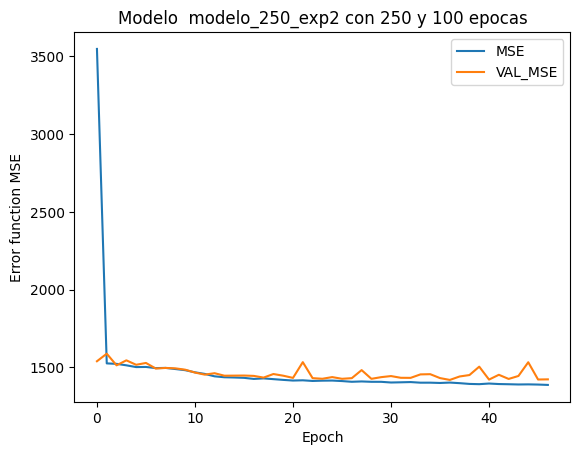

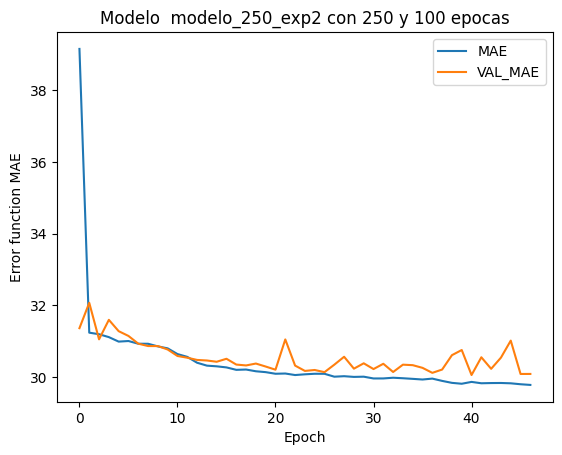

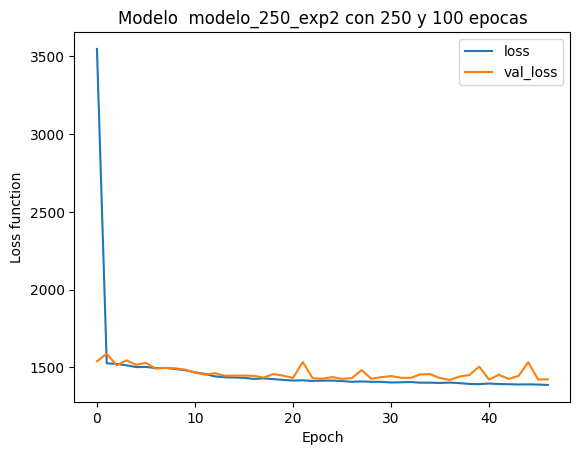

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


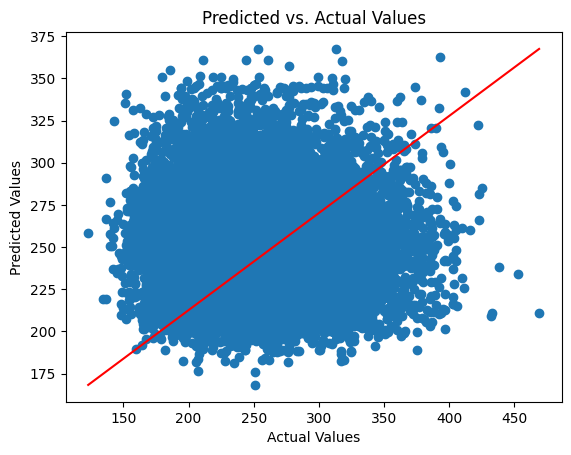

2024/12/03 01:19:01 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:19:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [47]:
model= run_experimen_2(model_id='modelo_250_exp2',num_neuronas=250, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 8215.9990 - mean_absolute_error: 57.3566 - mean_squared_error: 8215.9990 - val_loss: 1538.5322 - val_mean_absolute_error: 31.4072 - val_mean_squared_error: 1538.5322
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1549.5150 - mean_absolute_error: 31.4470 - mean_squared_error: 1549.5150 - val_loss: 1616.7737 - val_mean_absolute_error: 32.3341 - val_mean_squared_error: 1616.7737
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1564.9207 - mean_absolute_error: 31.5564 - mean_squared_error: 1564.9207 - val_loss: 1540.8954 - val_mean_absolute_error: 31.4744 - val_mean_squared_error: 1540.8954
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1527.9688 - mean_absolute_error: 31.2735 - mean_squared_error: 1527.9688 - val_loss: 1530.4236 - val_mean_absolute_error: 31.1859 - val_mean_squared_error: 1530.4236
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1521.7520 - mean_abso

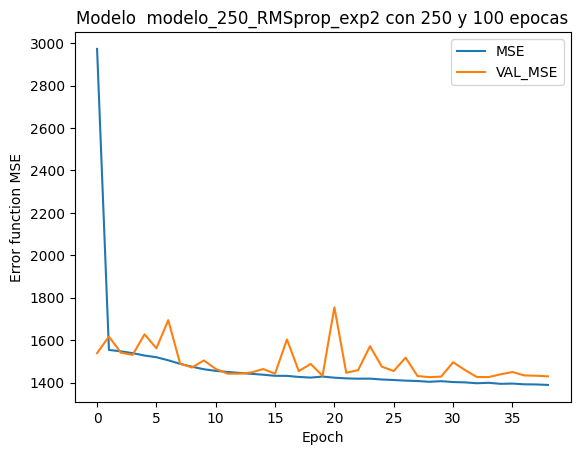

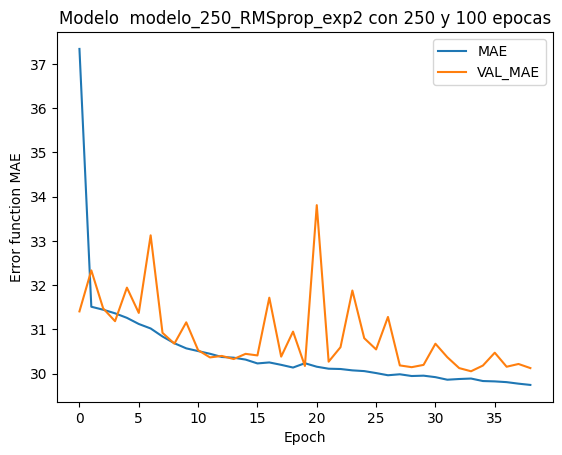

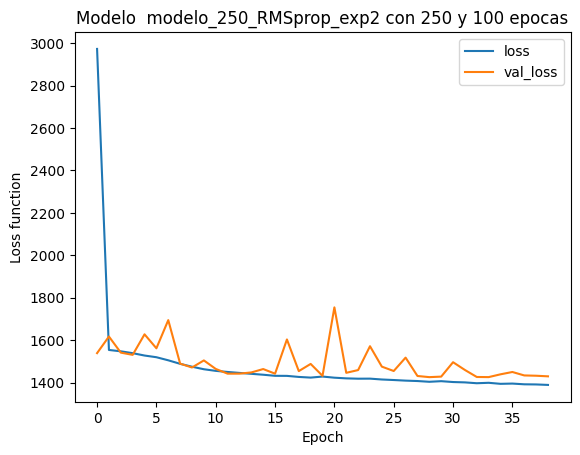

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


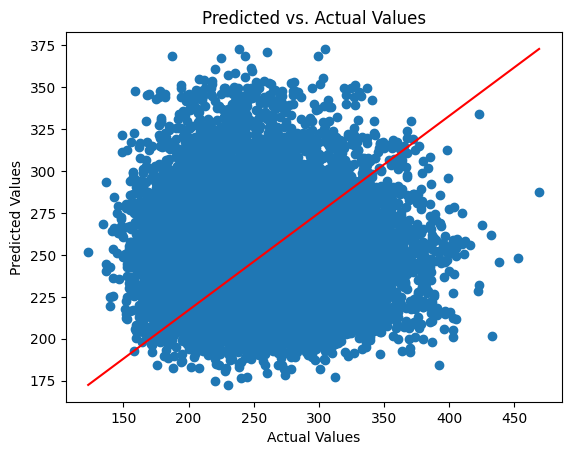

2024/12/03 01:23:06 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:23:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [48]:
model= run_experimen_2(model_id='modelo_250_RMSprop_exp2',num_neuronas=250, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 11789.0420 - mean_absolute_error: 69.0587 - mean_squared_error: 11789.0420 - val_loss: 1502.8882 - val_mean_absolute_error: 31.1687 - val_mean_squared_error: 1502.8882
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 1480.0592 - mean_absolute_error: 30.8317 - mean_squared_error: 1480.0592 - val_loss: 1477.9550 - val_mean_absolute_error: 30.6687 - val_mean_squared_error: 1477.9550
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1463.6696 - mean_absolute_error: 30.6034 - mean_squared_error: 1463.6696 - val_loss: 1479.9047 - val_mean_absolute_error: 30.8750 - val_mean_squared_error: 1479.9047
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1443.8562 - mean_absolute_error: 30.4678 - mean_squared_error: 1443.8562 - val_loss: 1456.2710 - val_mean_absolute_error: 30.5744 - val_mean_squared_error: 1456.2710
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1442.2195 - mean_ab

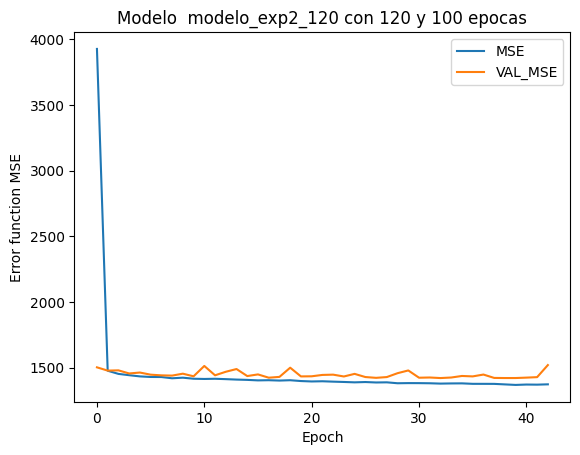

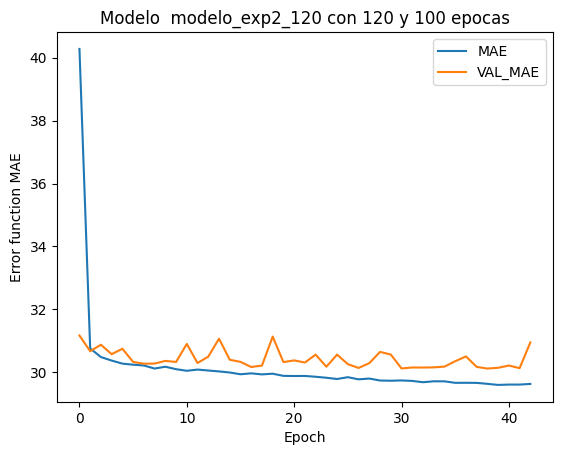

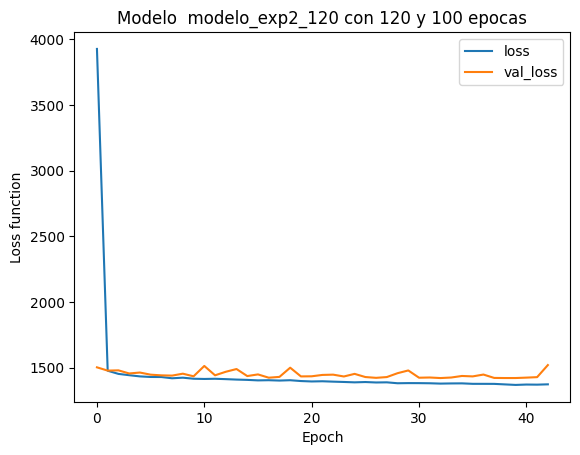

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


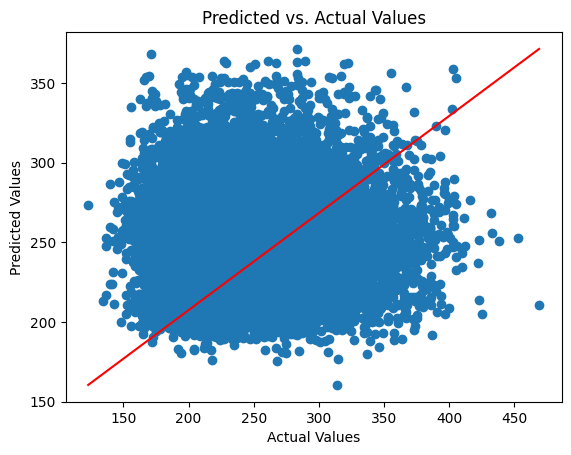

2024/12/03 01:27:43 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:27:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [49]:
model= run_experimen_2(model_id='modelo_exp2_120',num_neuronas=120, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")  

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 9968.3965 - mean_absolute_error: 63.9251 - mean_squared_error: 9968.3965 - val_loss: 1552.0696 - val_mean_absolute_error: 31.6671 - val_mean_squared_error: 1552.0696
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1527.2448 - mean_absolute_error: 31.2018 - mean_squared_error: 1527.2448 - val_loss: 1500.1796 - val_mean_absolute_error: 30.9891 - val_mean_squared_error: 1500.1796
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1508.5752 - mean_absolute_error: 31.1361 - mean_squared_error: 1508.5752 - val_loss: 1511.7572 - val_mean_absolute_error: 30.9677 - val_mean_squared_error: 1511.7572
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1488.5826 - mean_absolute_error: 30.8606 - mean_squared_error: 1488.5826 - val_loss: 1472.5977 - val_mean_absolute_error: 30.6753 - val_mean_squared_error: 1472.5977
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1471.0442 - mean_abso

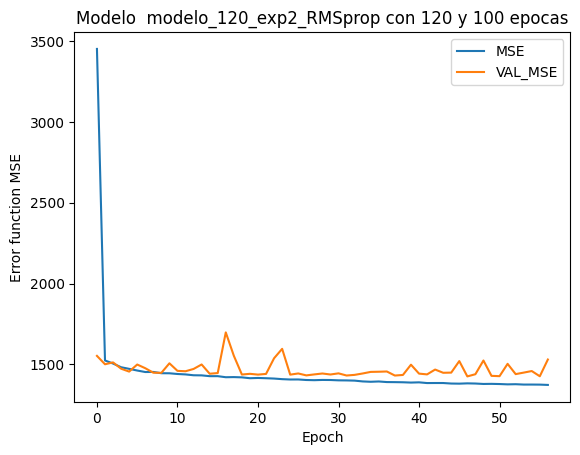

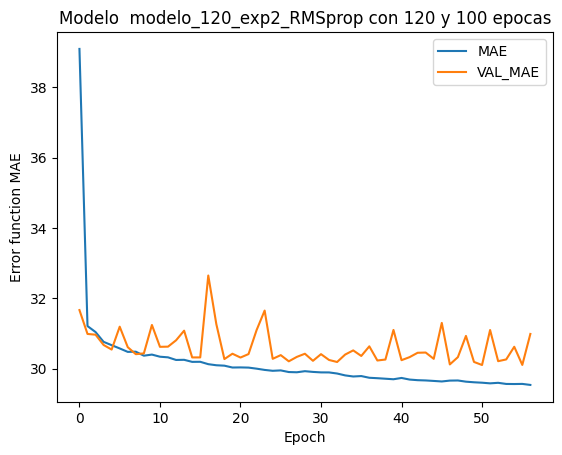

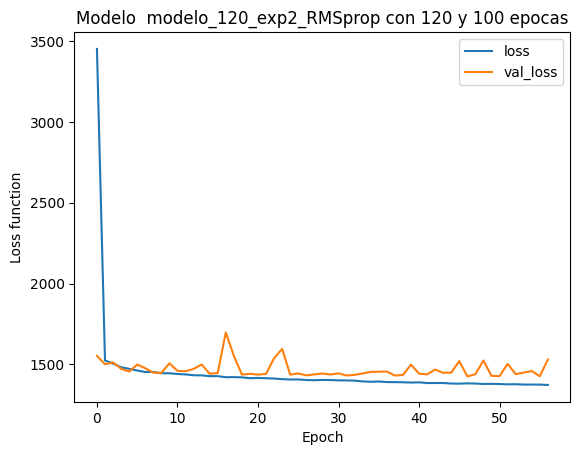

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


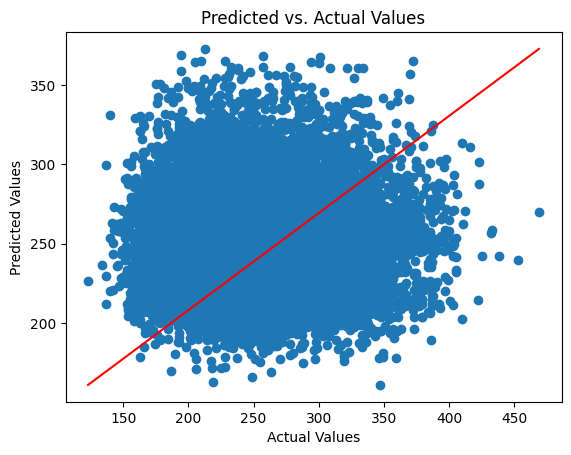

2024/12/03 01:33:36 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:33:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [50]:
model= run_experimen_2(model_id='modelo_120_exp2_RMSprop',num_neuronas=120, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")  

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 12789.5410 - mean_absolute_error: 73.0794 - mean_squared_error: 12789.5410 - val_loss: 1533.4161 - val_mean_absolute_error: 31.4391 - val_mean_squared_error: 1533.4161
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1498.3938 - mean_absolute_error: 30.9745 - mean_squared_error: 1498.3938 - val_loss: 1483.6261 - val_mean_absolute_error: 30.9231 - val_mean_squared_error: 1483.6261
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1478.8628 - mean_absolute_error: 30.8029 - mean_squared_error: 1478.8628 - val_loss: 1471.2476 - val_mean_absolute_error: 30.8351 - val_mean_squared_error: 1471.2476
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1438.6261 - mean_absolute_error: 30.3552 - mean_squared_error: 1438.6261 - val_loss: 1461.8748 - val_mean_absolute_error: 30.5714 - val_mean_squared_error: 1461.8748
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1450.3475 - mean_a

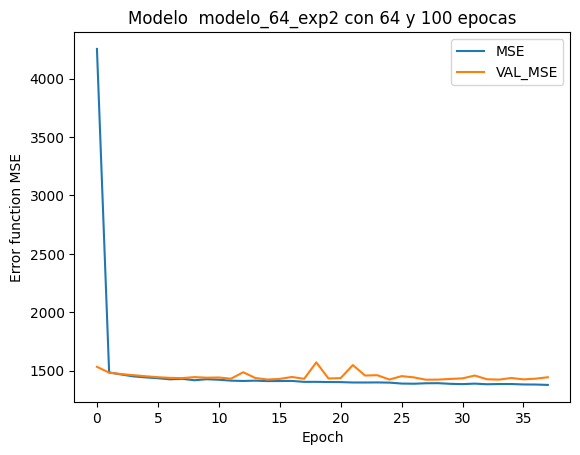

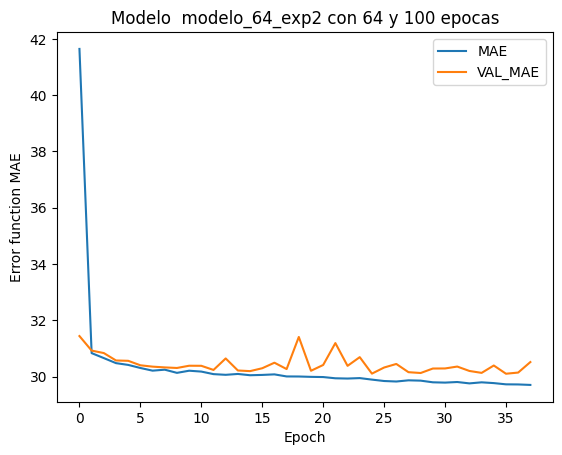

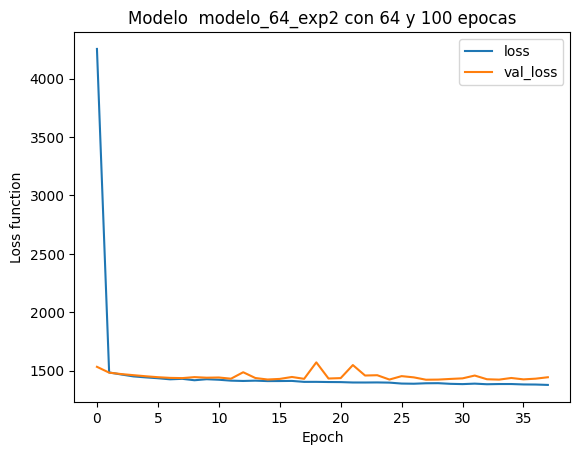

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


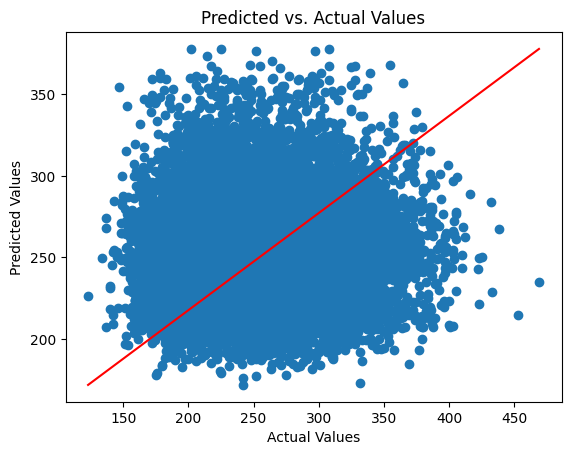

2024/12/03 01:37:50 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:38:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [51]:
model= run_experimen_2(model_id='modelo_64_exp2',num_neuronas=64, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 11329.2520 - mean_absolute_error: 68.7956 - mean_squared_error: 11329.2520 - val_loss: 1515.8142 - val_mean_absolute_error: 31.2414 - val_mean_squared_error: 1515.8142
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1496.8894 - mean_absolute_error: 30.9197 - mean_squared_error: 1496.8894 - val_loss: 1491.2277 - val_mean_absolute_error: 30.8889 - val_mean_squared_error: 1491.2277
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1495.5403 - mean_absolute_error: 30.9383 - mean_squared_error: 1495.5403 - val_loss: 1475.7214 - val_mean_absolute_error: 30.7836 - val_mean_squared_error: 1475.7214
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1471.1089 - mean_absolute_error: 30.7208 - mean_squared_error: 1471.1089 - val_loss: 1464.8815 - val_mean_absolute_error: 30.6380 - val_mean_squared_error: 1464.8815
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1460.7578 - mean_ab

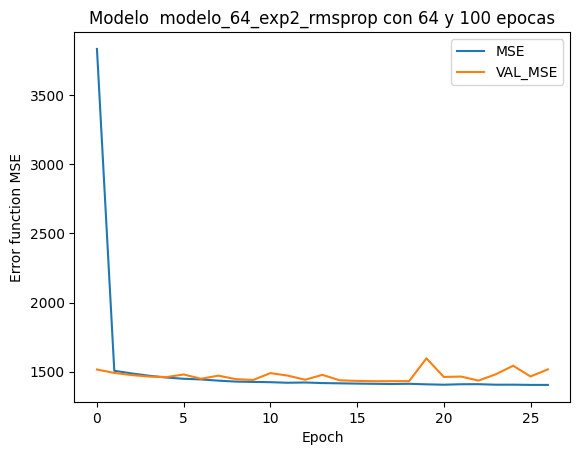

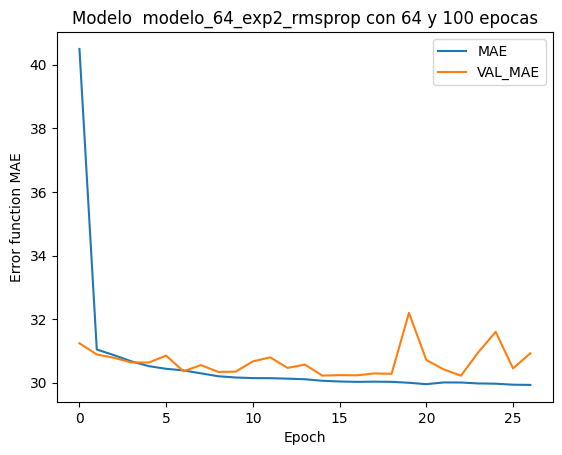

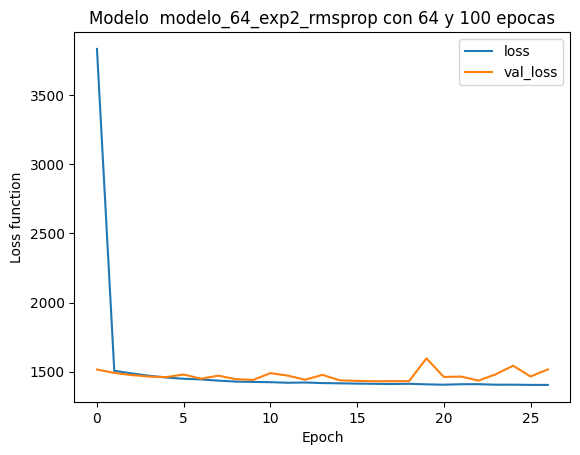

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


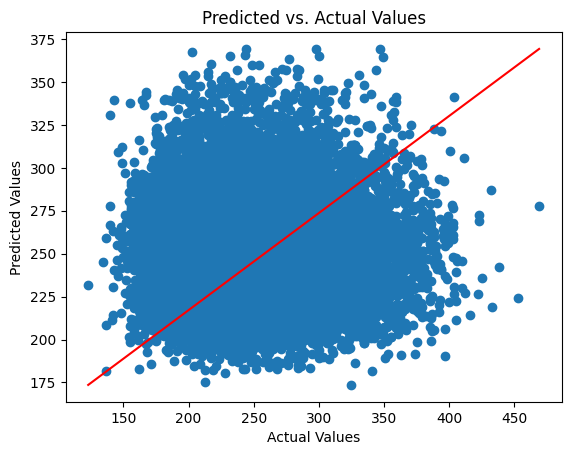

2024/12/03 01:40:49 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:40:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [52]:
model= run_experimen_2(model_id='modelo_64_exp2_rmsprop',num_neuronas=64, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 14006.5869 - mean_absolute_error: 77.6244 - mean_squared_error: 14006.5869 - val_loss: 1518.6925 - val_mean_absolute_error: 31.2697 - val_mean_squared_error: 1518.6925
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1475.5557 - mean_absolute_error: 30.7407 - mean_squared_error: 1475.5557 - val_loss: 1502.3516 - val_mean_absolute_error: 31.1488 - val_mean_squared_error: 1502.3516
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1455.8405 - mean_absolute_error: 30.4878 - mean_squared_error: 1455.8405 - val_loss: 1481.7043 - val_mean_absolute_error: 30.6530 - val_mean_squared_error: 1481.7043
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1441.2391 - mean_absolute_error: 30.3738 - mean_squared_error: 1441.2391 - val_loss: 1442.0344 - val_mean_absolute_error: 30.3953 - val_mean_squared_error: 1442.0344
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1429.5242 - mean_a

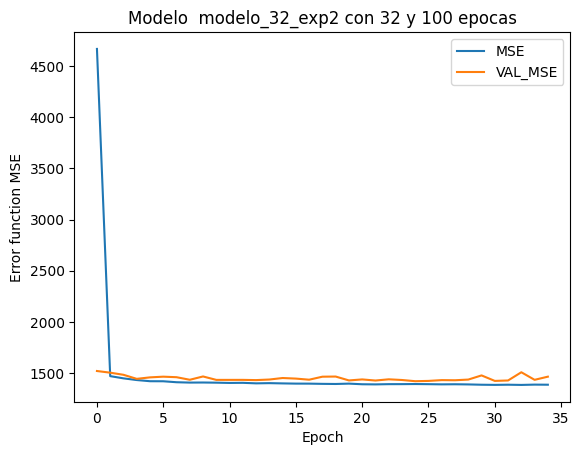

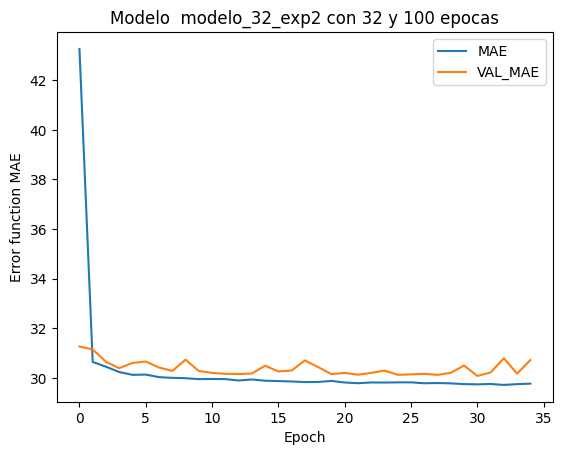

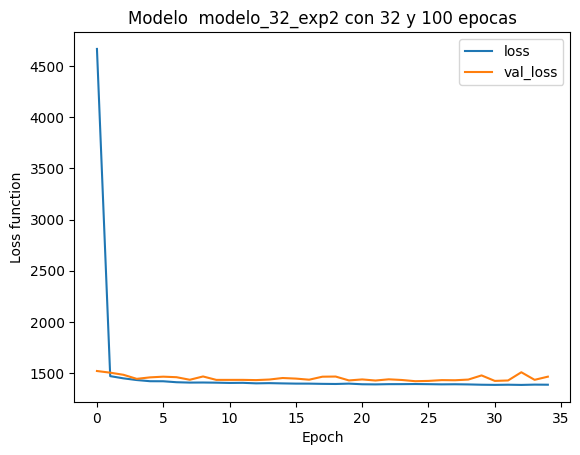

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


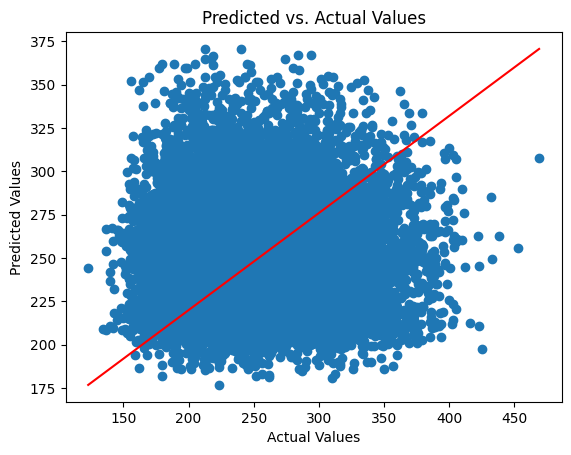

2024/12/03 01:44:34 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:44:44 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [53]:
model= run_experimen_2(model_id='modelo_32_exp2',num_neuronas=32, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="adam")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

Epoch 1/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 12177.5674 - mean_absolute_error: 72.5112 - mean_squared_error: 12177.5674 - val_loss: 1600.5453 - val_mean_absolute_error: 32.1609 - val_mean_squared_error: 1600.5453
Epoch 2/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1520.6466 - mean_absolute_error: 31.2298 - mean_squared_error: 1520.6466 - val_loss: 1539.0164 - val_mean_absolute_error: 31.4542 - val_mean_squared_error: 1539.0164
Epoch 3/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1518.2209 - mean_absolute_error: 31.1486 - mean_squared_error: 1518.2209 - val_loss: 1515.0981 - val_mean_absolute_error: 31.1393 - val_mean_squared_error: 1515.0981
Epoch 4/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1515.6455 - mean_absolute_error: 31.1588 - mean_squared_error: 1515.6455 - val_loss: 1524.1740 - val_mean_absolute_error: 31.3469 - val_mean_squared_error: 1524.1740
Epoch 5/100
1666/1666 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 1511.6115 - mean_ab

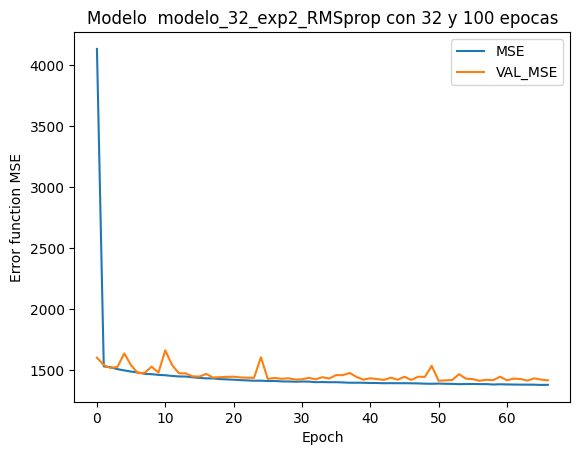

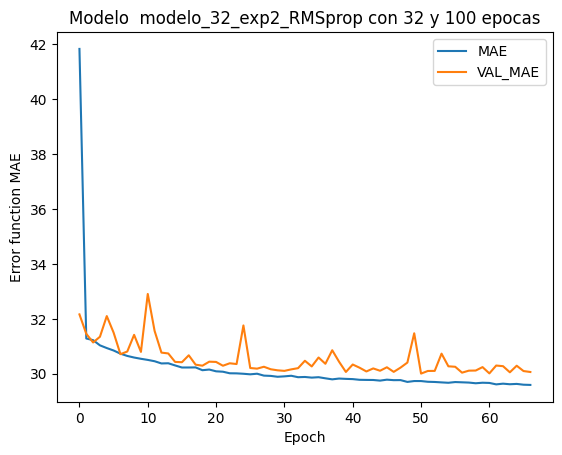

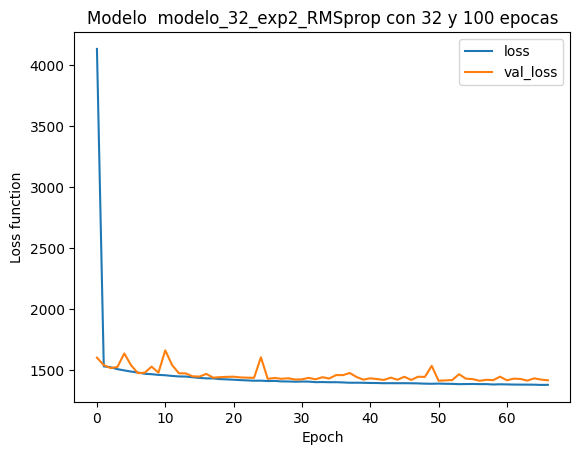

521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


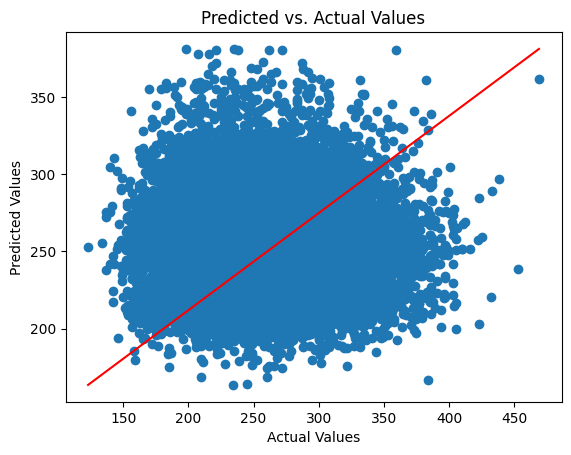

2024/12/03 01:51:23 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.
2024/12/03 01:51:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [54]:
model= run_experimen_2(model_id='modelo_32_exp2_RMSprop',num_neuronas=32, loss_function='mean_squared_error', epochs=100,activation_func='relu',optimzer="RMSprop")
# keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

# Review best model

In [126]:
# Specify the path to the model in MLflow
# best model from last run for all sets of parameters
model_uri = "runs:/d33d802e99a54669ac67cb328692a07e/keras_model"  # Replace with the actual run ID
# Load the model
loaded_model = mlflow.keras.load_model(model_uri)

521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


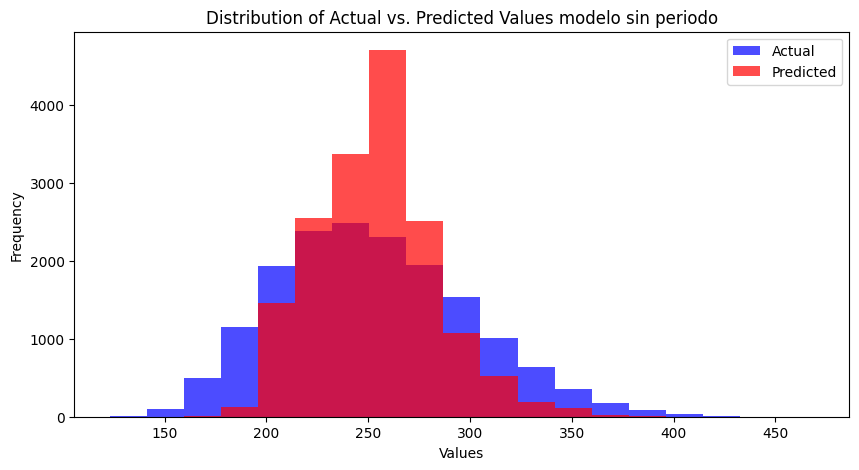

In [127]:
plot_pred_vs_actual_hist(loaded_model,test_ds,test,"modelo sin periodo")
keras.utils.plot_model(loaded_model, show_shapes=True, rankdir="LR")

938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


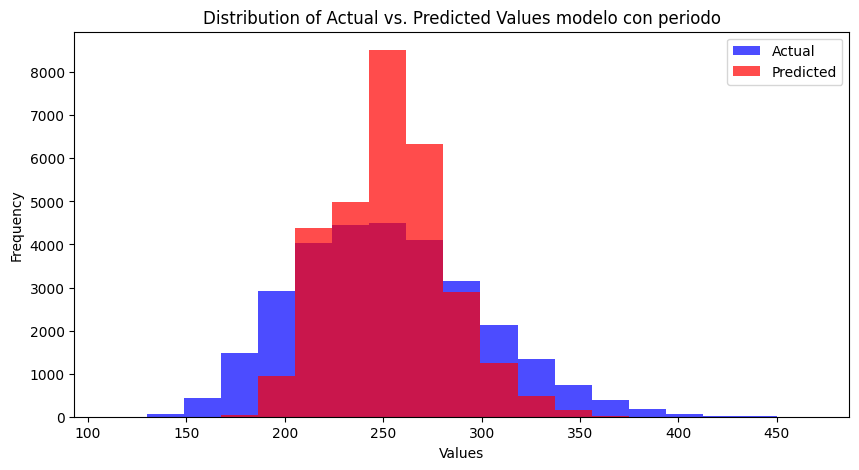

In [128]:
df_2= pd.read_csv("../ingeniera_de_datos/clean_saber11.csv")
df_2=prepare_data(df_2)

feats_ordered_2=cat_string_feats+cat_num_feats+["periodo"]
df_2 = df_2[feats_ordered_2+[target]]
test_2 = df_2.drop(train.index)
test_ds_2 = dataframe_to_dataset(test_2)
test_ds_2 = test_ds_2.batch(batch_size)
# Specify the path to the model in MLflow
# best model from last run for all sets of parameters
model_uri = "runs:/7b5001af03c2424f804d766bd0ad03e0/keras_model"  # Replace with the actual run ID
# Load the model
loaded_model = mlflow.keras.load_model(model_uri)
plot_pred_vs_actual_hist(loaded_model,test_ds_2,test_2,"modelo con periodo")
keras.utils.plot_model(loaded_model, show_shapes=True, rankdir="LR")